## Reto 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a calcular e interpretar errores estándar e intervalos de confianza
 
---
    
### 2. Desarrollo:

Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:

1. Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
2. Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
3. Grafica la distribución muestral de la media y la mediana.
4. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
5. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
6. Comparte tus hallazgos con tus compañeros.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('../../Datasets/videogame_sales-raw.csv', index_col=0)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.size

165980

In [6]:
gsales = df['Global_Sales']

means = []

for i in range(100_000):
    sample = gsales.sample(frac=.2, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [7]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 0.4452048192771084
Valor máximo: 0.6859006024096386
Rango: 0.24069578313253015


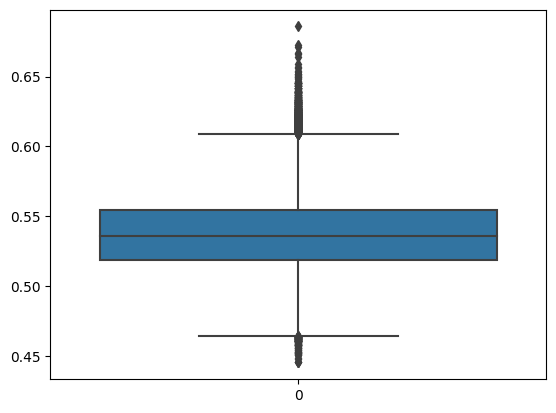

In [8]:
sns.boxplot(serie_means);

In [9]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [11]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {gsales.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 0.48846378012048186 < 0.5374406555006628 < 0.5944701807228915


In [12]:
mean_of_intervals = ((gsales.mean() - limite_inferior) + (limite_superior - gsales.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {gsales.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 0.5374406555006628 +/- 0.05300320030120481


C:\Users\eleri\AppData\Local\Temp\ipykernel_3536\4077346501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


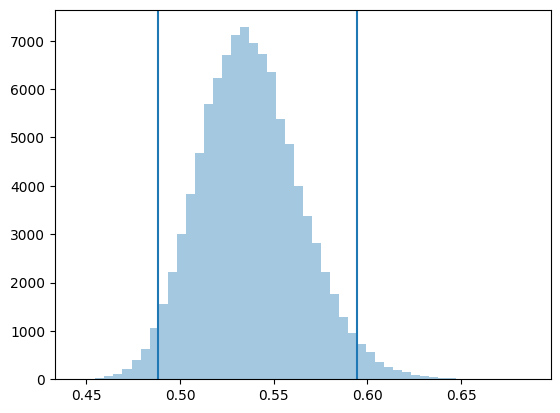

In [13]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

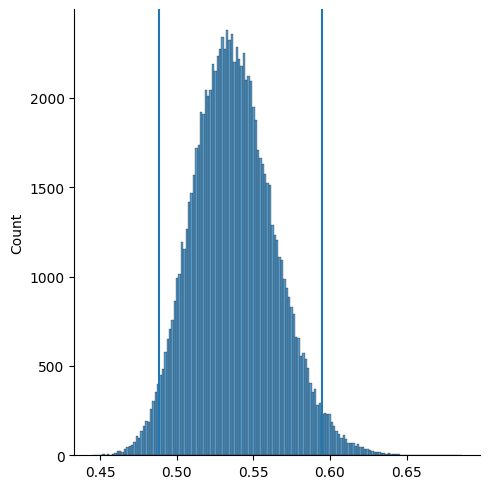

In [14]:
sns.displot(serie_means)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);